In [58]:
import torch 

In [59]:
import numpy as np

In [244]:
# creating some data to train Linear Regression 
x = torch.tensor(np.arange(10), dtype = torch.float16)
y = x*5 + 10 + torch.randint(low = -5, high = 5, size = (10,), dtype = torch.float16)
print(x)
print(y)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float16)
tensor([13., 10., 21., 26., 32., 36., 38., 49., 45., 53.], dtype=torch.float16)


<AxesSubplot:>

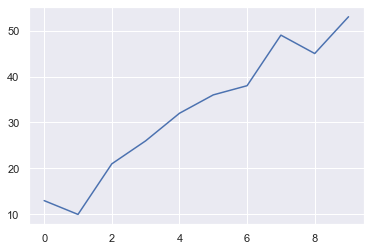

In [245]:
import seaborn as sns
sns.set()
sns.lineplot(x = x, y = y)

In [246]:
# initializing weights
# we have only one feature, so we need to find two coefficients: slope and intercept 
# let's initialize them as zeros 

w = torch.zeros(2, dtype = torch.float16, )
print(w)

tensor([0., 0.], dtype=torch.float16)


In [247]:
# functions
def predict(w, x):
    y_pred = w[0]*x + w[1]
    return y_pred 

def mseerror(y, y_pred):
    loss_val = ((y_pred - y)**2).mean()
    return loss_val 

# derivative from mse with respect to beta1: 2x*(y - y_pred)
def beta1gradient(x, y, y_pred):
    direction = np.dot(2*x, y_pred - y).mean()
    return direction 
# derivative from mse with respect to beta0: 2x*(y - y_pred)
def beta0gradient(x, y, y_pred):
    direction = np.dot(2, y_pred - y).mean()
    return direction

In [248]:
# let's check our predictions before training 
y_pred = predict(w, x)
error = mseerror(y, y_pred)
print(error)

tensor(1238., dtype=torch.float16)


<AxesSubplot:>

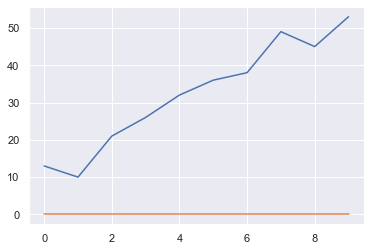

In [249]:
sns.set()
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)

In [266]:
#training 
#first let's train our model with a stopping criteria as numbers of steps 
learning_rait = 0.0006 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float16)
for step in range(number_of_steps):
    y_pred = predict(w, x)
    beta1 = beta1gradient(x, y, y_pred)
    beta0 = beta0gradient(x, y, y_pred)
    w -= learning_rait*torch.tensor([beta1,beta0]) 
    error = mseerror(y, y_pred)
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1238.0, weights = tensor([2.2148, 0.0388], dtype=torch.float16)
step №1: loss = 559.0, weights = tensor([3.6699, 0.0655], dtype=torch.float16)
step №2: loss = 265.5, weights = tensor([4.6250, 0.0844], dtype=torch.float16)
step №3: loss = 138.625, weights = tensor([5.2539, 0.0980], dtype=torch.float16)
step №4: loss = 83.75, weights = tensor([5.6680, 0.1083], dtype=torch.float16)
step №5: loss = 60.0625, weights = tensor([5.9414, 0.1163], dtype=torch.float16)
step №6: loss = 49.71875, weights = tensor([6.1172, 0.1229], dtype=torch.float16)
step №7: loss = 45.34375, weights = tensor([6.2344, 0.1284], dtype=torch.float16)
step №8: loss = 43.46875, weights = tensor([6.3125, 0.1334], dtype=torch.float16)
step №9: loss = 42.53125, weights = tensor([6.3633, 0.1379], dtype=torch.float16)
step №10: loss = 42.1875, weights = tensor([6.3945, 0.1422], dtype=torch.float16)
step №11: loss = 42.0625, weights = tensor([6.4141, 0.1462], dtype=torch.float16)
step №12: loss = 41.9375, wei

step №339: loss = 35.375, weights = tensor([6.2852, 1.2500], dtype=torch.float16)
step №340: loss = 35.34375, weights = tensor([6.2812, 1.2529], dtype=torch.float16)
step №341: loss = 35.375, weights = tensor([6.2812, 1.2559], dtype=torch.float16)
step №342: loss = 35.34375, weights = tensor([6.2812, 1.2588], dtype=torch.float16)
step №343: loss = 35.3125, weights = tensor([6.2812, 1.2617], dtype=torch.float16)
step №344: loss = 35.28125, weights = tensor([6.2812, 1.2646], dtype=torch.float16)
step №345: loss = 35.28125, weights = tensor([6.2812, 1.2676], dtype=torch.float16)
step №346: loss = 35.3125, weights = tensor([6.2773, 1.2705], dtype=torch.float16)
step №347: loss = 35.3125, weights = tensor([6.2773, 1.2734], dtype=torch.float16)
step №348: loss = 35.3125, weights = tensor([6.2773, 1.2764], dtype=torch.float16)
step №349: loss = 35.25, weights = tensor([6.2773, 1.2793], dtype=torch.float16)
step №350: loss = 35.21875, weights = tensor([6.2773, 1.2822], dtype=torch.float16)
ste

step №685: loss = 29.65625, weights = tensor([6.1094, 2.3516], dtype=torch.float16)
step №686: loss = 29.59375, weights = tensor([6.1094, 2.3555], dtype=torch.float16)
step №687: loss = 29.546875, weights = tensor([6.1094, 2.3594], dtype=torch.float16)
step №688: loss = 29.59375, weights = tensor([6.1055, 2.3633], dtype=torch.float16)
step №689: loss = 29.53125, weights = tensor([6.1055, 2.3672], dtype=torch.float16)
step №690: loss = 29.5, weights = tensor([6.1055, 2.3711], dtype=torch.float16)
step №691: loss = 29.453125, weights = tensor([6.1055, 2.3750], dtype=torch.float16)
step №692: loss = 29.453125, weights = tensor([6.1055, 2.3789], dtype=torch.float16)
step №693: loss = 29.421875, weights = tensor([6.1055, 2.3828], dtype=torch.float16)
step №694: loss = 29.40625, weights = tensor([6.1055, 2.3867], dtype=torch.float16)
step №695: loss = 29.375, weights = tensor([6.1055, 2.3906], dtype=torch.float16)
step №696: loss = 29.375, weights = tensor([6.1055, 2.3926], dtype=torch.float

<AxesSubplot:>

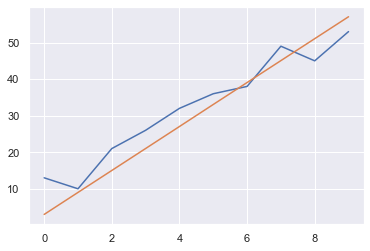

In [251]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)

In [269]:
#training 
#now stopping criteria is difference between errors  
learning_rait = 0.0006 
w = torch.zeros(2, dtype = torch.float16)
y_pred = predict(w, x)
previous_error = mseerror(y, y_pred)
beta1 = beta1gradient(x, y, y_pred)
beta0 = beta0gradient(x, y, y_pred)
w -= learning_rait*torch.tensor([beta1,beta0]) 
error = mseerror(y, y_pred)
y_pred = predict(w, x)
beta1 = beta1gradient(x, y, y_pred)
beta0 = beta0gradient(x, y, y_pred)
w -= learning_rait*torch.tensor([beta1,beta0]) 
previous_error = error
error = mseerror(y, y_pred)
while previous_error - error > 0.0000000005:
    y_pred = predict(w, x)
    beta1 = beta1gradient(x, y, y_pred)
    beta0 = beta0gradient(x, y, y_pred)
    w -= learning_rait*torch.tensor([beta1,beta0]) 
    previous_error = error 
    error = mseerror(y, y_pred)
    print(f'did one more step, loss reduced by {previous_error - error}')

did one more step, loss reduced by 293.5
did one more step, loss reduced by 126.875
did one more step, loss reduced by 54.875
did one more step, loss reduced by 23.6875
did one more step, loss reduced by 10.34375
did one more step, loss reduced by 4.375
did one more step, loss reduced by 1.875
did one more step, loss reduced by 0.9375
did one more step, loss reduced by 0.34375
did one more step, loss reduced by 0.125
did one more step, loss reduced by 0.125
did one more step, loss reduced by 0.03125
did one more step, loss reduced by 0.03125
did one more step, loss reduced by 0.0625
did one more step, loss reduced by 0.03125
did one more step, loss reduced by 0.0625
did one more step, loss reduced by 0.03125
did one more step, loss reduced by -0.03125


<AxesSubplot:>

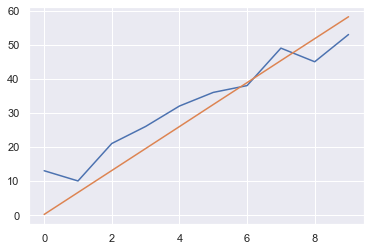

In [270]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)

In [279]:
#now let's use PyTorch gradient calculation. We don't need our gradient function. 
learning_rait = 0.0006 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float16, requires_grad = True) #it should be mentioned that in the future 
                                                            #you will need a derivative with respect to these values
for step in range(number_of_steps):
    y_pred = predict(w, x)
    error = mseerror(y, y_pred)
    error.backward()
    with torch.no_grad():
        w -= learning_rait*w.grad
    w.grad.zero_()
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1238.0, weights = tensor([0.2213, 0.0387], dtype=torch.float16, requires_grad=True)
step №1: loss = 1155.0, weights = tensor([0.4348, 0.0762], dtype=torch.float16, requires_grad=True)
step №2: loss = 1078.0, weights = tensor([0.6411, 0.1125], dtype=torch.float16, requires_grad=True)
step №3: loss = 1007.0, weights = tensor([0.8398, 0.1477], dtype=torch.float16, requires_grad=True)
step №4: loss = 940.0, weights = tensor([1.0312, 0.1818], dtype=torch.float16, requires_grad=True)
step №5: loss = 877.5, weights = tensor([1.2168, 0.2147], dtype=torch.float16, requires_grad=True)
step №6: loss = 820.0, weights = tensor([1.3955, 0.2466], dtype=torch.float16, requires_grad=True)
step №7: loss = 766.0, weights = tensor([1.5684, 0.2776], dtype=torch.float16, requires_grad=True)
step №8: loss = 715.5, weights = tensor([1.7344, 0.3076], dtype=torch.float16, requires_grad=True)
step №9: loss = 669.0, weights = tensor([1.8945, 0.3367], dtype=torch.float16, requires_grad=True)
step №

step №320: loss = 31.296875, weights = tensor([6.1992, 2.0117], dtype=torch.float16, requires_grad=True)
step №321: loss = 31.296875, weights = tensor([6.1992, 2.0137], dtype=torch.float16, requires_grad=True)
step №322: loss = 31.296875, weights = tensor([6.1992, 2.0156], dtype=torch.float16, requires_grad=True)
step №323: loss = 31.328125, weights = tensor([6.1992, 2.0176], dtype=torch.float16, requires_grad=True)
step №324: loss = 31.328125, weights = tensor([6.1992, 2.0195], dtype=torch.float16, requires_grad=True)
step №325: loss = 31.328125, weights = tensor([6.1992, 2.0215], dtype=torch.float16, requires_grad=True)
step №326: loss = 31.296875, weights = tensor([6.1992, 2.0234], dtype=torch.float16, requires_grad=True)
step №327: loss = 31.28125, weights = tensor([6.1992, 2.0254], dtype=torch.float16, requires_grad=True)
step №328: loss = 31.25, weights = tensor([6.1992, 2.0273], dtype=torch.float16, requires_grad=True)
step №329: loss = 31.25, weights = tensor([6.1992, 2.0293], 

step №672: loss = 27.953125, weights = tensor([6.1055, 2.6992], dtype=torch.float16, requires_grad=True)
step №673: loss = 27.921875, weights = tensor([6.1055, 2.7012], dtype=torch.float16, requires_grad=True)
step №674: loss = 27.921875, weights = tensor([6.1055, 2.7031], dtype=torch.float16, requires_grad=True)
step №675: loss = 27.953125, weights = tensor([6.1055, 2.7051], dtype=torch.float16, requires_grad=True)
step №676: loss = 27.96875, weights = tensor([6.1055, 2.7070], dtype=torch.float16, requires_grad=True)
step №677: loss = 27.953125, weights = tensor([6.1055, 2.7090], dtype=torch.float16, requires_grad=True)
step №678: loss = 27.953125, weights = tensor([6.1055, 2.7109], dtype=torch.float16, requires_grad=True)
step №679: loss = 27.921875, weights = tensor([6.1016, 2.7129], dtype=torch.float16, requires_grad=True)
step №680: loss = 27.90625, weights = tensor([6.1016, 2.7148], dtype=torch.float16, requires_grad=True)
step №681: loss = 27.875, weights = tensor([6.1016, 2.716

<AxesSubplot:>

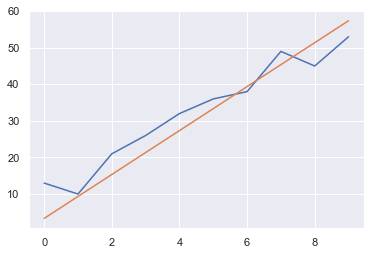

In [281]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred.detach().numpy())